# Lab 3:  groupby and more (Seaborn) plots

This lab explores the FBI NICS Firearms Background Check data, which records the number of background check made.  A background check must be made prior to *some* sales of firearms (a big exception is private sales.)  This data is often used as the best approximation of total gun sales at a given time.

BuzzFeed converts the PDF data supplied by the FBI to CSV files.

For more information on the dataset: [https://github.com/BuzzFeedNews/nics-firearm-background-checks](https://github.com/BuzzFeedNews/nics-firearm-background-checks)

For a direct link to the dataset (current as of July 2019):  [https://raw.githubusercontent.com/BuzzFeedNews/nics-firearm-background-checks/master/data/nics-firearm-background-checks.csv](https://raw.githubusercontent.com/BuzzFeedNews/nics-firearm-background-checks/master/data/nics-firearm-background-checks.csv)

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', None)

Read the CSV file into a dataframe called `guns`, and display the dataframe to make sure it was loaded correctly.

In [2]:
guns = pd.read_csv('nics-firearm-background-checks.csv')

Make the `month` column into a `datetime` object.

In [3]:
guns['month'] = pd.to_datetime(guns['month'])

In [8]:
guns.dtypes

month                        datetime64[ns]
state                                object
permit                              float64
permit_recheck                      float64
handgun                             float64
long_gun                            float64
other                               float64
multiple                              int64
admin                               float64
prepawn_handgun                     float64
prepawn_long_gun                    float64
prepawn_other                       float64
redemption_handgun                  float64
redemption_long_gun                 float64
redemption_other                    float64
returned_handgun                    float64
returned_long_gun                   float64
returned_other                      float64
rentals_handgun                     float64
rentals_long_gun                    float64
private_sale_handgun                float64
private_sale_long_gun               float64
private_sale_other              

There was no day in the original `month` column.  What happens to the day once we convert this column into a `datetime` object?

Assume it's first day of the month

In [6]:
guns['month']

0       2019-07-01
1       2019-07-01
2       2019-07-01
3       2019-07-01
4       2019-07-01
5       2019-07-01
6       2019-07-01
7       2019-07-01
8       2019-07-01
9       2019-07-01
10      2019-07-01
11      2019-07-01
12      2019-07-01
13      2019-07-01
14      2019-07-01
15      2019-07-01
16      2019-07-01
17      2019-07-01
18      2019-07-01
19      2019-07-01
20      2019-07-01
21      2019-07-01
22      2019-07-01
23      2019-07-01
24      2019-07-01
25      2019-07-01
26      2019-07-01
27      2019-07-01
28      2019-07-01
29      2019-07-01
           ...    
13665   1998-11-01
13666   1998-11-01
13667   1998-11-01
13668   1998-11-01
13669   1998-11-01
13670   1998-11-01
13671   1998-11-01
13672   1998-11-01
13673   1998-11-01
13674   1998-11-01
13675   1998-11-01
13676   1998-11-01
13677   1998-11-01
13678   1998-11-01
13679   1998-11-01
13680   1998-11-01
13681   1998-11-01
13682   1998-11-01
13683   1998-11-01
13684   1998-11-01
13685   1998-11-01
13686   1998

To get a feel for the data, plot the number of handgun background checks (the `handgun` column) made in New York on the y axis and the date on the x axis.

In [21]:
ny_filter = guns['state'] == 'New York'
ny_guns = guns[ny_filter]

Text(0, 0.5, 'Made in New York')

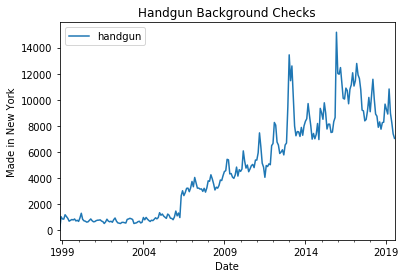

In [24]:
ny_guns.plot(x='month', y='handgun')
plt.title('Handgun Background Checks')
plt.xlabel('Date')
plt.ylabel('Made in New York')

What do you notice about the plot?

What was the mean number of handgun background checks? 

In [17]:
guns['handgun'].mean()

6319.7039122486285

### Groupby


What if we wanted to find the mean number of handgun checks for each state?  Our usual method of filtering would take a while.  Instead we will use the *group by* process, which:
- *splits* the data into groups based on some criteria
- *applies* a function to each group independently
- *combines* the results into a data structure

The splitting step is done by the function `groupby()` and a second function, like `mean()`, is applied to the groups.

In [19]:
guns.groupby("state").mean()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
state,,,,,,,,,,,,,,,,,,,,,,,,,
Alabama,6405.401606,132.238095,9594.309237,11159.228916,381.196721,457.008032,0.128514,21.126168,30.864486,0.321739,1547.168224,1734.186916,4.417391,0.000000,0.000000,0.000000,0.025,0.000000,9.513889,8.750000,0.888889,0.313433,0.263889,0.238095,30697.907631
Alaska,74.192771,3.690476,1984.204819,2531.104418,182.721311,133.257028,0.076305,5.088785,6.967290,0.017391,165.859813,190.457944,0.930435,20.467742,16.327869,0.254545,0.000,0.000000,8.222222,9.888889,0.777778,0.074627,0.111111,0.031746,5144.690763
Arizona,3435.200803,402.023810,8273.064257,6632.144578,689.090164,406.574297,26.678715,7.878505,4.967290,0.426087,967.892523,593.831776,3.591304,85.790323,7.360656,0.290909,0.000,0.000000,11.430556,7.361111,1.458333,0.447761,0.458333,0.095238,20563.562249
Arkansas,2399.136546,736.047619,4383.136546,7224.240964,163.032787,285.919679,12.473896,8.747664,20.257009,0.191304,817.200935,1870.485981,2.017391,0.000000,0.000000,0.000000,0.000,0.000000,6.791667,8.305556,0.986111,0.343284,0.388889,0.126984,16849.674699
California,29954.321285,0.000000,27043.911647,26179.763052,3509.073770,834.795181,112.369478,0.000000,0.000000,0.000000,226.210280,185.088785,7.095652,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,86201.228916
Colorado,2438.329317,0.000000,11789.751004,12132.473896,762.762295,1332.036145,11.758065,0.177570,0.084112,0.000000,0.383178,0.387850,0.000000,183.500000,37.704918,1.218182,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28134.108434
Connecticut,7004.943775,258.833333,3985.469880,2741.417671,237.959016,32.224900,116.630522,0.000000,0.000000,0.539130,0.004673,0.000000,0.000000,0.016129,0.000000,0.000000,0.000,0.000000,0.416667,0.513889,0.041667,0.611940,0.347222,0.079365,14041.759036
Delaware,128.738956,0.000000,982.244980,1104.240964,74.286885,40.734940,0.204819,0.556075,0.630841,0.052174,7.420561,5.584112,0.765217,18.661290,0.000000,0.090909,0.000,0.000000,37.625000,16.472222,2.180556,0.671642,0.388889,0.047619,2326.381526
District of Columbia,19.642570,0.000000,26.212851,2.726908,0.016393,0.240964,0.224900,0.000000,0.000000,0.000000,0.004695,0.000000,0.000000,0.096774,0.081967,0.927273,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,49.309237


If we only wanted to see the `handgun` column, we can use:


In [29]:
guns.groupby("state").mean()["handgun"]

state
Alabama                  9594.309237
Alaska                   1984.204819
Arizona                  8273.064257
Arkansas                 4383.136546
California              27043.911647
Colorado                11789.751004
Connecticut              3985.469880
Delaware                  982.244980
District of Columbia       26.212851
Florida                 28192.108434
Georgia                  9737.265060
Guam                       39.453815
Hawaii                      0.012048
Idaho                    2245.502008
Illinois                11713.690763
Indiana                 10437.016064
Iowa                       88.674699
Kansas                   4240.040161
Kentucky                 7928.016064
Louisiana                8131.943775
Maine                    2039.405622
Mariana Islands             1.725000
Maryland                 2784.779116
Massachusetts            3054.088353
Michigan                 4706.389558
Minnesota                5401.955823
Mississippi              5477.93

Other functions we can use with `groupby()` are:
- `mean()` : Compute mean of groups
- `sum()` : Compute sum of group values
- `size()` : Compute group sizes
- `count()` : Compute count of group
- `std()` : Standard deviation of groups
- `var()` : Compute variance of groups
- `describe()` : Generates descriptive statistics
- `min()` : Compute min of group values
- `max()` : Compute max of group values

For example, what is the standard deviation of long gun background checks in all states?

In [32]:
guns.groupby("state").std()['long_gun']

state
Alabama                  6256.016364
Alaska                    834.361416
Arizona                  2265.085739
Arkansas                 3719.235508
California              11150.800858
Colorado                 4239.974378
Connecticut              1669.690125
Delaware                  547.599724
District of Columbia       13.544048
Florida                  7886.025047
Georgia                  5257.225511
Guam                       16.457430
Hawaii                      1.796143
Idaho                    1255.693264
Illinois                 4011.857865
Indiana                  4879.102579
Iowa                     1708.625459
Kansas                   2437.696936
Kentucky                 4267.402826
Louisiana                5591.272570
Maine                    1368.328564
Mariana Islands             3.476999
Maryland                 1809.001710
Massachusetts             962.291575
Michigan                 5152.343649
Minnesota                4159.232730
Mississippi              4625.63

Notice that the output of `guns.groupby("state").mean()["handgun"]` looks a lot like the output of `value_counts()`.  We can use it to make a bar plot.  Try it below.

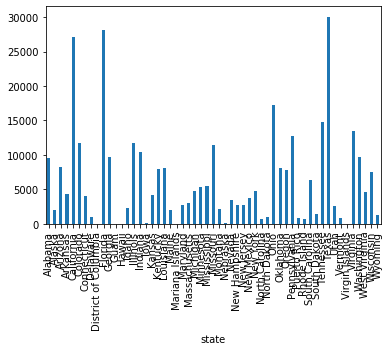

In [33]:
guns.groupby("state").mean()["handgun"].plot.bar()

<details> <summary>Answer:</summary>
guns.groupby("state").mean()["handgun"].plot.bar()
</details>

We can also use `groupby` for dates.  For example, to sum by month:

In [34]:
guns.groupby(guns["month"].dt.month).sum()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
month,,,,,,,,,,,,,,,,,,,,,,,,,
1,9104701.0,550639.0,7521763.0,7922333.0,251908.0,313062,59382.0,5184.0,8444.0,158.0,421032.0,552064.0,1264.0,12029.0,2816.0,270.0,39.0,26.0,7410.0,5693.0,721.0,216.0,226.0,17.0,26741397
2,8736399.0,409420.0,8831798.0,8560378.0,258365.0,405030,63687.0,5397.0,8252.0,168.0,593138.0,804276.0,1411.0,11915.0,2880.0,331.0,26.0,26.0,8098.0,6272.0,750.0,221.0,225.0,36.0,28708499
3,10214291.0,757439.0,8901304.0,9104493.0,294471.0,364035,61085.0,5015.0,7313.0,149.0,421727.0,547466.0,1269.0,14149.0,3228.0,388.0,30.0,27.0,9627.0,7701.0,984.0,262.0,248.0,34.0,30716735
4,8895257.0,794912.0,7221856.0,7421223.0,238357.0,307035,51294.0,4631.0,6541.0,179.0,370247.0,467285.0,1051.0,14063.0,3234.0,421.0,20.0,32.0,8163.0,6710.0,769.0,253.0,260.0,35.0,25813828
5,8153787.0,994943.0,6418244.0,6199941.0,211586.0,305536,48895.0,4669.0,6389.0,123.0,391436.0,453335.0,1045.0,14676.0,3171.0,463.0,31.0,23.0,7583.0,5515.0,560.0,217.0,258.0,38.0,23222464
6,7714185.0,1156049.0,6255008.0,6135439.0,234675.0,307729,48932.0,4682.0,6352.0,132.0,407495.0,466442.0,1129.0,14162.0,3121.0,374.0,25.0,23.0,8117.0,6012.0,824.0,258.0,267.0,37.0,22771469
7,7578905.0,1097698.0,6123608.0,6212794.0,222483.0,279641,80145.0,4890.0,6724.0,122.0,412913.0,483885.0,1068.0,14441.0,3045.0,354.0,23.0,18.0,6651.0,4812.0,666.0,236.0,248.0,25.0,22535395
8,7097222.0,377420.0,6045375.0,7886120.0,182984.0,267264,51331.0,4677.0,6732.0,87.0,403916.0,543747.0,994.0,10895.0,2458.0,253.0,20.0,11.0,5593.0,4733.0,496.0,231.0,216.0,33.0,22892808
9,6859211.0,360873.0,5817370.0,8931343.0,180756.0,267379,61795.0,4777.0,6769.0,99.0,406238.0,596294.0,1025.0,9808.0,2360.0,217.0,33.0,20.0,5894.0,5478.0,523.0,210.0,235.0,31.0,23518738


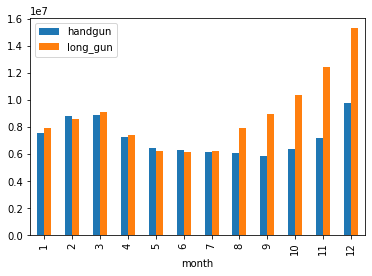

In [42]:
guns.groupby(guns["month"].dt.month).sum()[['handgun', 'long_gun']].plot.bar()

Which month has the most background checks for long guns?  For handgruns?

### Seaborn plotting

[Seaborn](https://seaborn.pydata.org) is a Python package for creating beautiful plots.

For example, suppose we want to make a scatter plot but use size and color to add more information to the plot.

In Pandas, make a scatter plot with number of handgun background checks on the x axis and number of long gun background checks on the y axis.

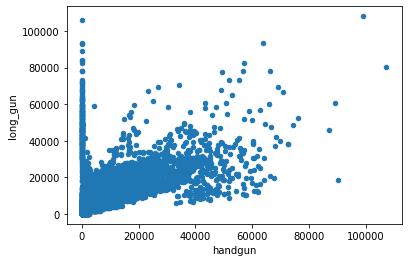

In [37]:
guns.plot.scatter(x='handgun', y='long_gun')

To make the same plot in Seaborn, we use the code:

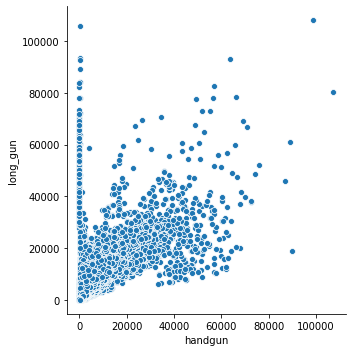

In [38]:
sns.relplot(x ="handgun", y = "long_gun", data = guns)

To color the points by the state:

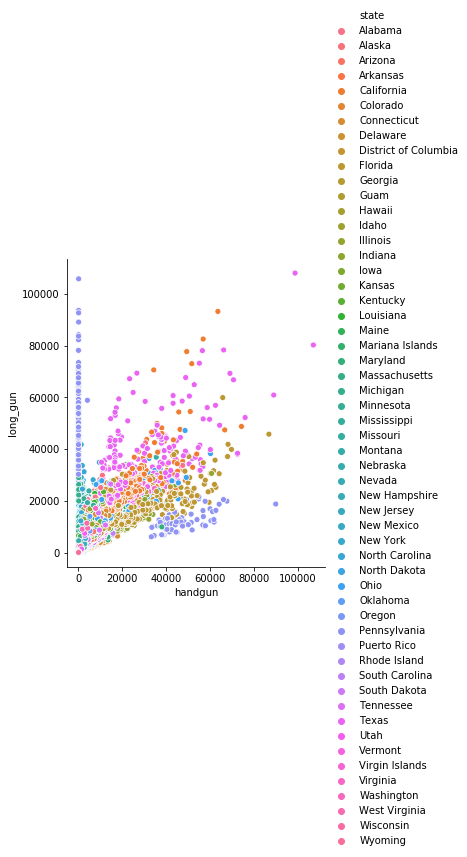

In [39]:
sns.relplot(x ="handgun", y = "long_gun", hue = "state", data = guns)

This plot is a little hard to interpret, so let's make a smaller dataset with only 5 states (whichever 5 you would like).

In [43]:
state_filter = (guns['state'] == 'New York') | (guns['state'] == 'New Jersey') | (guns['state'] == 'Texas') | (guns['state'] == 'Florida') | (guns['state'] == 'California')

In [48]:
gun5 = guns[state_filter]

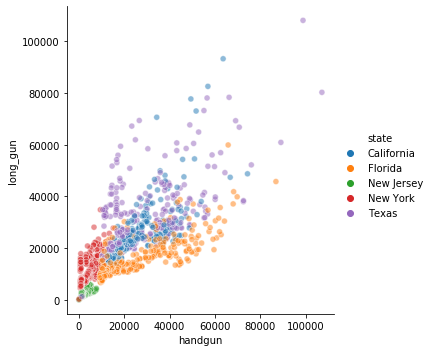

In [49]:
sns.relplot(x='handgun', y='long_gun', hue='state', alpha=0.5, data=gun5)

To size the circles by the total number of permit checks made that month:

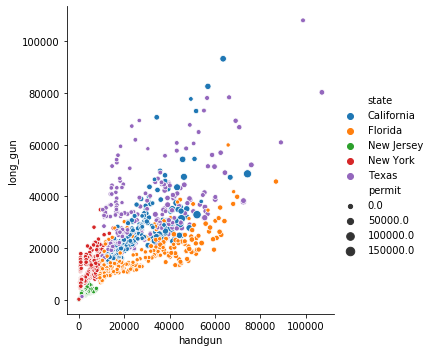

In [50]:
sns.relplot(x ="handgun", y = "long_gun", hue = "state", size = "permit", data = guns5)

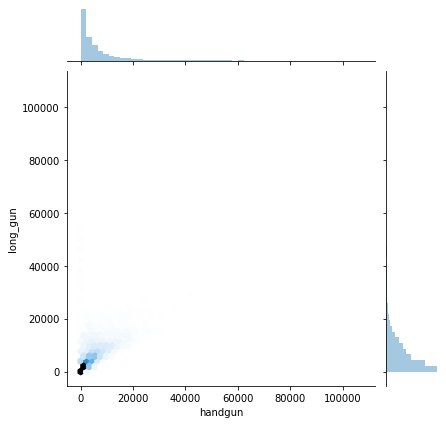

In [52]:
sns.jointplot(x='handgun', y='long_gun', kind='hex', data=guns)

There are some large hand gun and long gun background check values.  What state are they from?

What are the maximum values in the `handgun` and `long_gun` columns?

In [53]:
guns.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,13671.000000,2310.000000,13675.000000,13676.000000,6710.000000,13695.000000,13672.000000,11752.000000,11750.000000,6325.000000,11755.000000,11754.000000,6325.000000,3410.000000,3355.000000,3025.000000,2200.000000,2035.000000,3960.000000,3960.000000,3960.000000,3685.000000,3960.000000,3465.000000,13695.000000
mean,7124.674640,3395.032900,6319.703912,7781.612825,433.325186,279.101278,55.993051,5.014295,7.593702,0.261976,430.441344,586.743406,2.165692,43.292375,10.183010,1.259504,0.143636,0.135135,22.217424,18.084848,2.102778,0.750339,0.735606,0.109091,23224.737714
std,26866.563526,25773.300862,9071.492833,9164.097998,1311.931747,772.408998,583.039487,11.136070,15.896332,1.155721,824.669047,931.444778,5.122725,109.448490,24.506517,4.657349,0.986173,0.861568,92.166426,72.843314,8.261928,3.749930,3.089969,0.414365,37184.717655
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,964.000000,2107.000000,22.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4796.000000
50%,678.000000,0.000000,3280.000000,5127.500000,149.000000,130.000000,0.000000,0.000000,1.000000,0.000000,48.000000,175.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12853.000000
75%,4955.000000,9.000000,7793.000000,10402.250000,435.750000,310.000000,0.000000,5.000000,8.000000,0.000000,585.000000,850.750000,2.000000,33.000000,7.000000,0.000000,0.000000,0.000000,9.000000,10.000000,1.000000,0.000000,0.000000,0.000000,26834.500000
max,522188.000000,405293.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,10046.000000,8831.000000,79.000000,1031.000000,170.000000,73.000000,13.000000,12.000000,1299.000000,993.000000,195.000000,70.000000,56.000000,4.000000,541978.000000


Let's find a row containing the median handgun value 3280:

In [54]:
guns.loc[guns["handgun"] == 3280]

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
7772,2007-10-01,Kansas,0.0,NaN,3280.0,6405.0,NaN,196,0.0,0.0,2.0,NaN,254.0,484.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10621


Now find the rows containing the maximum handgun and long_gun values.

In [ ]:
guns.loc[guns['handgun'] == 107224]
guns.loc[guns['long_gun'] == 107224]

Challenges

- make a hexagonal plot of just the Texas handgun vs. long_gun background check numbers
- choose another Seaborn plot from the [gallery](https://seaborn.pydata.org/examples/index.html).  Can you make it with using background check data?